Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

This homework will require the use of a few datasets in a package written by the TA, Dan. Before beginning, please be sure to download and install the package. Example code for doing this is below:

In [37]:
# Un-comment the line below to install the package by deleting the # symbol
# install.packages("~/Downloads/AMSdata_0.1.0.tar.gz",repos = NULL, type = "source") # Change the first character string to the path of the source package 
library(AMSdata)

The `election_2016` dataset contains county-level information about the porportion of votes received in the presidential primaries for each candidate in 2016. Begin by subsetting the data to just the information concerning then-candidate Donald Trump. Name this subsetted data set `trump_2016`.

In [38]:
data("election_2016")

trump_2016 <- subset(election_2016, candidate=="Donald Trump")

Now quickly check to make sure the subset was done correctly before moving on.

In [39]:
stopifnot(round(mean(trump_2016$votes),digits=6) == 3709.576408)

Create a chloropleth map that shows the porportion of registered Republican voters that voted for Trump in each county. The variable from the `trump_2016` data set that you should use is `fraction_votes`. Use the `cut` function to create seven interval groups: 0% - 15%, 15% - 30%, 30% - 45%, 45% - 60%, 60% - 75%, 75% - 90%, and above 90%. This will be necessary when creating the color buckets for plotting. Remember to include all of the necessary plot elements like a title, legend, context information, etc.

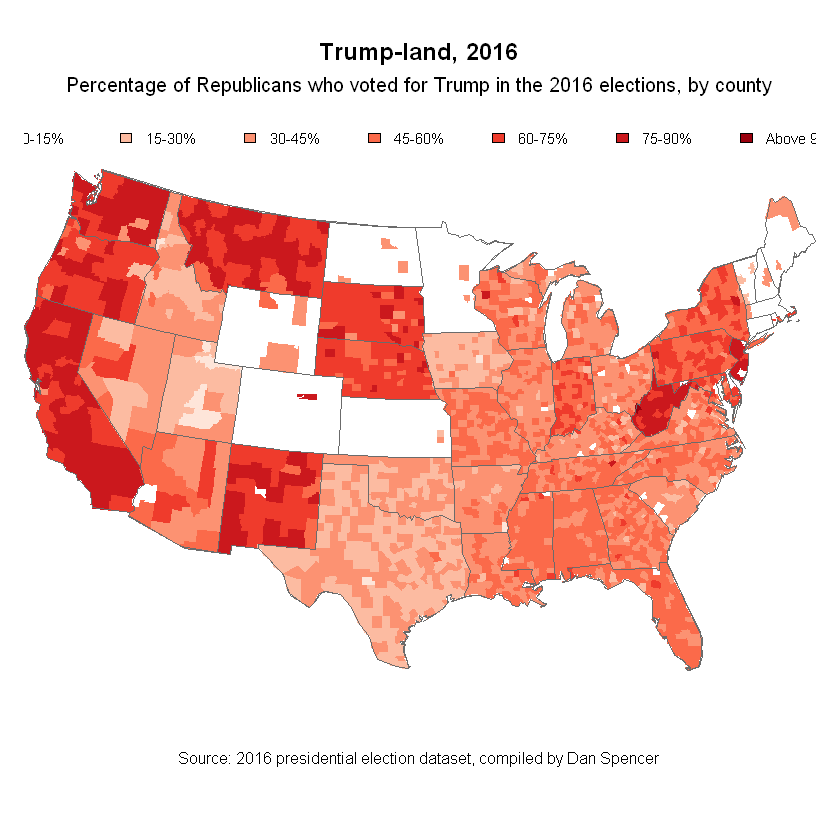

In [40]:
library(maps)
library(mapproj)
library(RColorBrewer)

data(county.fips)

colors = brewer.pal(7, "Reds")
trump_2016$colorBuckets <- as.numeric(cut(trump_2016$fraction_votes,
                                          c(-.01, .15, .30, .45, .60, .75, .90, 1.00)))
leg.txt <- c("0-15%", "15-30%", "30-45%", "45-60%", "60-75%",
             "75-90%", "Above 90%")

colorsmatched <- trump_2016$colorBuckets[match(county.fips$fips, trump_2016$fips)]

par(mar = c(1,1,1,1),
    pin = c(4,2),
    pty = "m",
    xaxs = "i",
    xaxt = 'n',
    xpd = FALSE,
    yaxs = "i",
    yaxt = 'n')

map("county", col = colors[colorsmatched], fill = TRUE,
    resolution = 0, lty = 0, projection = "polyconic")
map("state", col = "gray42", fill = FALSE, add = TRUE, lty
    = 1, lwd = 0.2, projection="polyconic")
map("usa", col="gray42", resolution=1,  projection="polyconic",
    add = TRUE)

title("Trump-land, 2016", line=-1.5)
mtext("Percentage of Republicans who voted for Trump in the 2016 elections, by county",
      font=1.5, line=-3)

legend("top", leg.txt, horiz = TRUE, fill = colors,
       inset=c(0,.12),bty="n", cex=0.75, pt.cex=1)

mtext("Source: 2016 presidential election dataset, compiled by Dan Spencer",
      cex = 0.8, side = 1, line = -3, outer = FALSE)

---

# Problem 2

Next, the `air_qual` data set includes information on the median levels of the pollutant measure PM2.5 at 142 outdoor monitoring stations in California in 2017. Use these data to create an isopleth map of the median PM2.5 levels in 2017. Include all necessary plot elements.

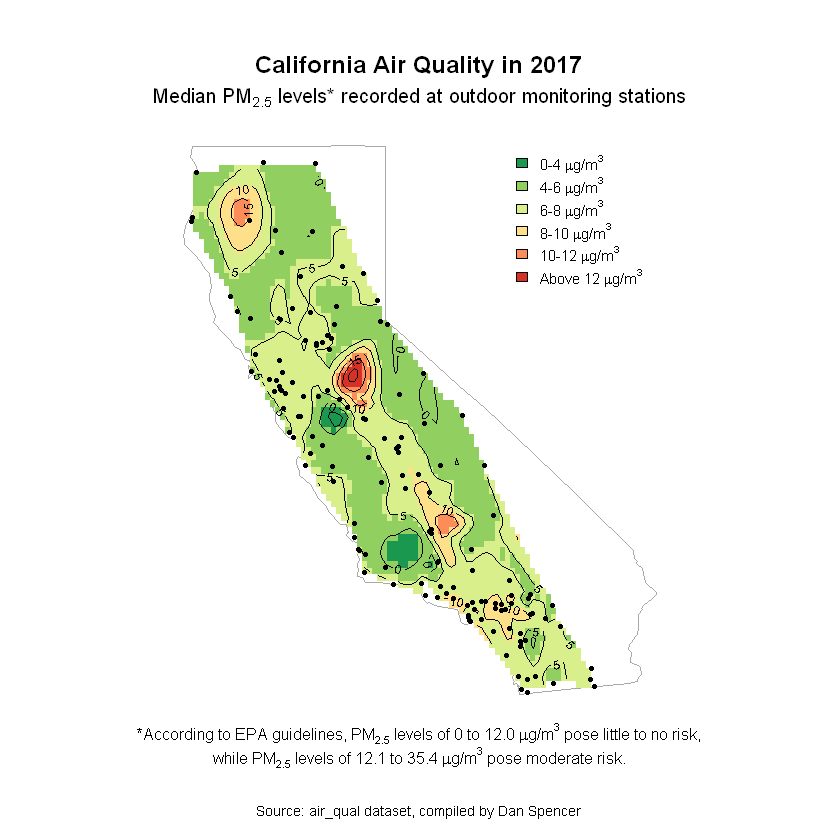

In [41]:
library(akima)
library(RColorBrewer)
data("air_qual")

colorscale = rev(brewer.pal(6, "RdYlGn"))
air_qual$colorBuckets <- as.numeric(cut(air_qual$pm2.5,
                                          c(0, 4, 6, 8, 10, 12, 18)))
leg.txt <- c(expression(paste("0-4 ",mu,"g/",m^3)),
             expression(paste("4-6 ",mu,"g/",m^3)),
             expression(paste("6-8 ",mu,"g/",m^3)),
             expression(paste("8-10 ",mu,"g/",m^3)),
             expression(paste("10-12 ",mu,"g/",m^3)),
             expression(paste("Above 12 ",mu,"g/",m^3)))

map("county", region="california", interior=F, col="darkgrey",
    mar=c(5,5,5,5))
par(xpd=TRUE)
airqual.int <- interp(x=air_qual$SITE_LONGITUDE,
                      y=air_qual$SITE_LATITUDE,
                      z=air_qual$pm2.5,
                      xo=seq(min(air_qual$SITE_LONGITUDE), max(air_qual$SITE_LONGITUDE), length=80),
                      yo=seq(min(air_qual$SITE_LATITUDE), max(air_qual$SITE_LATITUDE), length=80),
                      linear = F)                    
image(airqual.int, col=colorscale, axes=F, add=T)
contour(airqual.int, add=T, col="black")
points(air_qual$SITE_LONGITUDE, air_qual$SITE_LATITUDE,
       cex=0.75, pch=20)

title("California Air Quality in 2017", line=2.8)
mtext(expression(paste("Median ", PM[2.5], " levels* recorded at outdoor monitoring stations")),
      font=1.5, line=1.2)

legend("topright", leg.txt, fill = colorscale,
       bty="n", cex=0.75, pt.cex=1)

mtext("Source: air_qual dataset, compiled by Dan Spencer",
      cex = 0.7, side = 1, line = 4, outer = FALSE)
mtext(expression(paste("*According to EPA guidelines, ", PM[2.5], " levels of 0 to 12.0 ", mu,"g/",m^3, " pose little to no risk,")),
     cex = 0.8, side = 1, line = 1, outer = FALSE)
mtext(expression(paste("while ", PM[2.5], " levels of 12.1 to 35.4 ", mu,"g/",m^3, " pose moderate risk.")),
      cex = 0.8, side = 1, line = 2, outer = FALSE)

---

# Problem 3

The `lesson_8` data set contains mostly-cleaned text data from the lecture 8 slides. Use this information to produce two plots: a word cloud of the most common words used in the lecture, and a bar plot of the 8 most common words. In order to prevent too many words from appearing in the word cloud, set the minimum number of occurrances for each word to be 5. Include plot elements on the bar plot, but exclude the title, labels, and context information on the word cloud, as including it may be confusing.


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  25  33 
689 894  88 197  49  52  25  20  10   7   6   2   4   5   4   1   1   2   1   1 
 43 
  1 

Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"option could not be fit on page. It will not be plotted."Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"regular could not be fit on page. It will not be plotted."Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"subset could not be fit on page. It will not be plotted."Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"manipul could not be fit on page. It will not be plotted."Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"simul could not be fit on page. It will not be plotted."Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"maptat could not be fit on page. It will not be plotted."Warning message in wordcloud(ap.d$word, ap.d$freq, scale = c(8, 0.2), min.freq = 5, :
"polygon could not be fit on page. It will not be

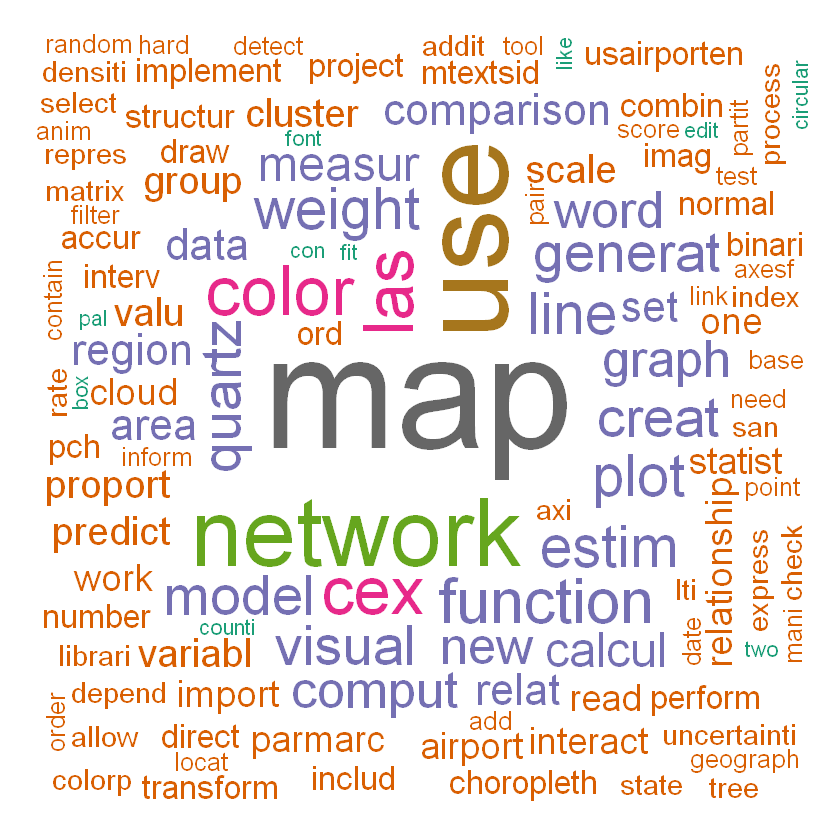

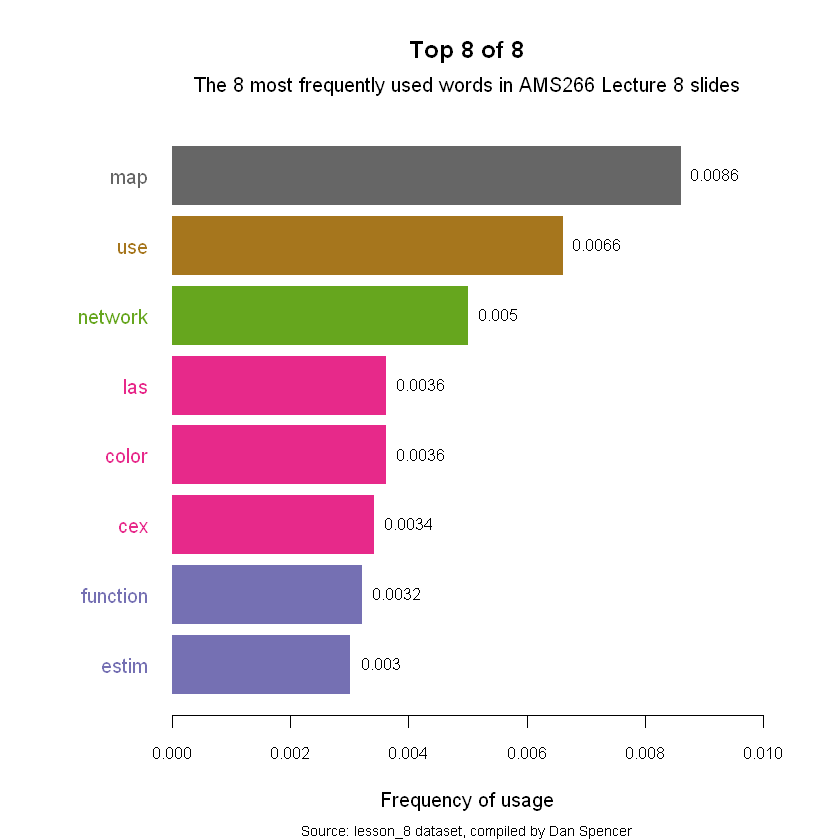

In [42]:
library(AMSdata)
data("lesson_8")

library(XML)
library(tm)
library(wordcloud)
library(RColorBrewer)

less.8 <- Corpus(VectorSource(lesson_8))

less.8 = tm_map(less.8, PlainTextDocument)
less.8 = tm_map(less.8, removePunctuation)
less.8 = tm_map(less.8, removeNumbers)
toSpace <- content_transformer(function(x, pattern) 
  {return (gsub(pattern," ", x))})
less.8 = tm_map(less.8,toSpace,"[^[:graph:]]")
less.8 = tm_map(less.8, content_transformer(tolower))
less.8 = tm_map(less.8, removeWords, stopwords('english'))
less.8 = tm_map(less.8, removeWords, c("can"))
less.8 = tm_map(less.8, stemDocument)
mapsing <- function(less.8) {
  less.8  <- gsub("maps", "map", less.8)
  return(less.8)}
less.8 = tm_map(less.8, mapsing)

ap.tdm = TermDocumentMatrix(less.8)
ap.m = as.matrix(ap.tdm)
ap.v = sort(rowSums(ap.m),decreasing=TRUE)
ap.d = data.frame(word = names(ap.v),freq=ap.v)
table(ap.d$freq)
pal2 = brewer.pal(8,"Dark2")

wordcloud(ap.d$word,ap.d$freq,
          scale=c(8,.2),min.freq=5,
          max.words=Inf, random.order=FALSE, rot.per=.15,
          colors=pal2)


#BAR CHART

kk = 8
ord = order(ap.d$freq, decreasing=T)
pal1 = brewer.pal(8,"Dark2")
colscale = c(pal1[3], pal1[3],
             pal1[4], pal1[4],
             pal1[4], pal1[5],
             pal1[7], pal1[8])

par(mar=c(5,7,5,3)+0.2)
barplot(height=round(ap.d$freq
                     [rev(ord[1:kk])]/sum(ap.d$freq), 4),
        names.arg=NULL, horiz=T, las=1,
        xlim=c(0,0.01), col=colscale, cex.axis=0.8,
        border=colscale)
mtext(side = 2, line = 1, text =
        ap.d$word[rev(ord[1:kk])], at =
        seq(0.7,length=8,by=1.2), las=2, 
      col=colscale)

title("Top 8 of 8", line=2.8)
mtext("The 8 most frequently used words in AMS266 Lecture 8 slides",
      font=1.5, line=1.2)

mtext("Source: lesson_8 dataset, compiled by Dan Spencer",
      cex = 0.7, side = 1, line = 4.2, outer = FALSE)

mtext("Frequency of usage",
      cex = 1, side = 1, line = 3, outer = FALSE)

text(x=ap.d$freq[rev(ord[1:kk])]/sum(ap.d$freq), 
     y=seq(0.7, length=8, by=1.2), las=2, 
     label=round(ap.d$freq[rev(ord[1:kk])]/sum(ap.d$freq),4), 
     pos=4, cex=.8)

---

# Problem 4

The `new_quakes` data set includes data on earthquakes that registered over a magnitude of 4.5 between October 23, 2017 and November 23, 2017 all over the world. Use this data frame to make a point process map in which the color of each point describes its magnitude. Be sure to include a title, legend, and context information!

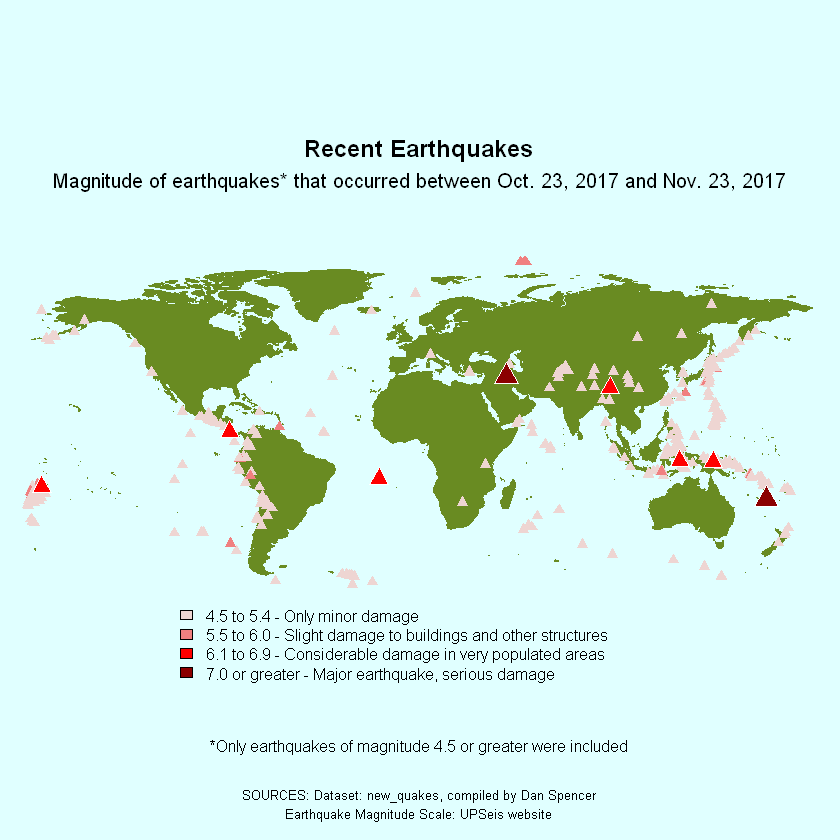

In [43]:
library(AMSdata)
data("new_quakes")

colorscale = c("mistyrose2", "lightcoral", "red", "red4")
new_quakes$colorBuckets <- as.numeric(cut(new_quakes$mag,
                                        c(0, 5.4, 6.0, 6.9, 8)))
cols_quakes <- colorscale[new_quakes$colorBuckets]
new_quakes$color <- cols_quakes

leg.txt <- c("4.5 to 5.4 - Only minor damage",
             "5.5 to 6.0 - Slight damage to buildings and other structures",
             "6.1 to 6.9 - Considerable damage in very populated areas",
             "7.0 or greater - Major earthquake, serious damage")
             
map("world", fill=TRUE, col="olivedrab4", bg="lightcyan1",
    border="olivedrab4",
    ylim=c(-60, 90), mar=c(0,0,0,0))
par(xpd=TRUE)

points(new_quakes$longitude, new_quakes$latitude,
       pch=17, col=cols_quakes)

jsec <- subset(new_quakes, new_quakes$colorBuckets==3)
points(jsec$longitude, jsec$latitude,
       pch=24, cex=1.6, col="white", bg="red")
jtop <- subset(new_quakes, new_quakes$colorBuckets==4)
points(jtop$longitude, jtop$latitude,
       pch=24, cex=2, col="white", bg="red4")

title("Recent Earthquakes", line=4)
mtext("Magnitude of earthquakes* that occurred between Oct. 23, 2017 and Nov. 23, 2017",
      font=1.5, line=2.5)

legend("bottom", leg.txt, fill = colorscale,
       inset=c(0,-.31), bty="n", cex=0.8, pt.cex=1)

mtext("*Only earthquakes of magnitude 4.5 or greater were included",
      cex = 0.8, side = 1, line = 6, outer = FALSE)
mtext("SOURCES: Dataset: new_quakes, compiled by Dan Spencer",
      cex = 0.65, side = 1, line = 8, outer = FALSE)
mtext("Earthquake Magnitude Scale: UPSeis website",
      cex = 0.65, side = 1, line = 8.8, outer = FALSE)